<a href="https://colab.research.google.com/github/Prethumnan/guvi-project/blob/main/Task_5_amended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

In [ ]:
data=pd.read_csv("takehome_user_engagement.csv")
df=pd.read_csv("takehome_users.csv",encoding = "ISO-8859-1")

In [ ]:
data.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [ ]:
data.shape

(207917, 3)

In [ ]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
m=[]
n=[]
u=[]
for i in list(set(df["creation_source"])):
  check=df[df["creation_source"]==i]
  z=list(check["opted_in_to_mailing_list"])
  z=z.count(0)
  o=list(check["opted_in_to_mailing_list"])
  o=o.count(1)
  m.append(i)
  n.append(z)
  u.append(o)
mail=pd.DataFrame({"creation_source":m,"opted for mailing":n,"not opted for mailing":u})
mail["total"]=mail["opted for mailing"]+mail["not opted for mailing"]
n=[]
for i in range(5):
  t=mail["opted for mailing"][i]*100/mail["total"][i]
  n.append(round(t,2))
mail["% opted for mailing"]=n
mail

,creation_source,opted for mailing,not opted for mailing,total,% opted for mailing
0,ORG_INVITE,3176,1078,4254,74.66
1,SIGNUP,1562,525,2087,74.84
2,SIGNUP_GOOGLE_AUTH,1047,338,1385,75.60
3,GUEST_INVITE,1622,541,2163,74.99
4,PERSONAL_PROJECTS,1599,512,2111,75.75


In [ ]:
df.shape

(12000, 10)

In [ ]:
data["year"]=data["time_stamp"].apply(lambda x:x[0:4])

In [ ]:
data["month"]=data["time_stamp"].apply(lambda x:x[5:7])

In [ ]:
user=data.drop("time_stamp",axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


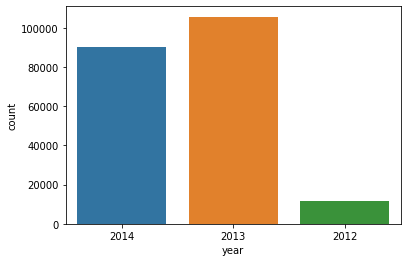

In [ ]:
sns.countplot(user["year"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


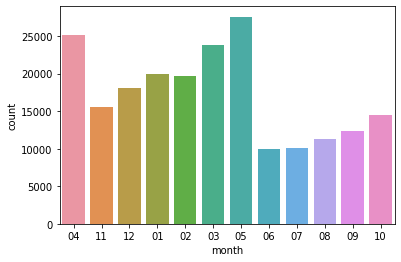

In [ ]:
sns.countplot(user["month"])

In [ ]:
m=[i for i in user["user_id"]]
u=set(m)
l=[]
for i in u:
  l.append([m.count(i),i])
l.sort()
l=l[::-1]
print(l)

[[606, 3623], [600, 906], [593, 1811], [590, 7590], [585, 8068], [581, 9402], [580, 4022], [566, 3269], [547, 9312], [545, 7210], [541, 8029], [538, 2474], [526, 2658], [521, 8280], [521, 69], [520, 5297], [519, 4019], [517, 9083], [511, 2519], [509, 4263], [502, 3226], [501, 10599], [500, 6312], [499, 10953], [496, 8426], [496, 2316], [489, 603], [488, 2078], [487, 8768], [487, 7536], [487, 445], [484, 11428], [482, 6171], [480, 7120], [480, 5609], [479, 9281], [478, 10734], [476, 8381], [476, 5939], [474, 7572], [472, 5386], [471, 11300], [471, 2622], [470, 2771], [470, 1822], [469, 6064], [469, 4282], [463, 8912], [463, 6405], [463, 5682], [463, 5151], [461, 4402], [460, 5101], [458, 9728], [452, 2300], [452, 1769], [451, 9450], [450, 9958], [449, 5240], [449, 4965], [447, 2568], [446, 8721], [442, 9434], [438, 4924], [438, 2620], [437, 754], [436, 5861], [435, 9691], [434, 4143], [433, 6757], [429, 7511], [428, 728], [425, 6204], [424, 10524], [424, 8553], [423, 6282], [422, 7375],

In [ ]:
k=[]
m=[]
for i,j in l:
  if i>100:
    k.append(i)
    m.append(j)
most_visited=pd.DataFrame({"user_id":m,"frequency":k})
most_visited 

,user_id,frequency
0,3623,606
1,906,600
2,1811,593
3,7590,590
4,8068,585
...,...,...
648,1781,102
649,1694,102
650,11469,101
651,10663,101


In [ ]:
df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


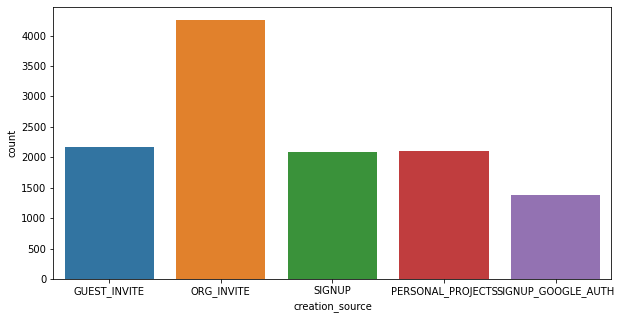

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df["creation_source"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


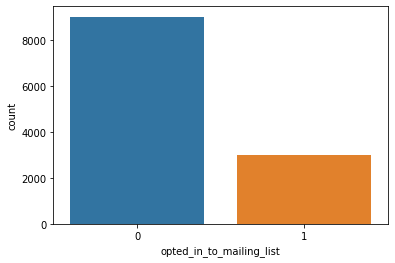

In [ ]:
sns.countplot(df["opted_in_to_mailing_list"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


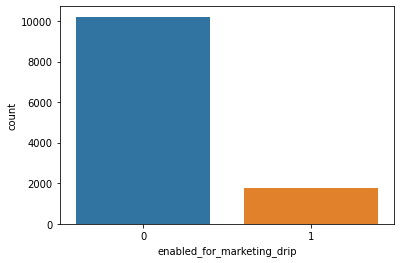

In [ ]:
sns.countplot(df["enabled_for_marketing_drip"])

From the above observation,


*Most people visited in the year of 2019


*There are less visitors in the year of 2012


*More visitors are found in the month of April and may than the others.May be the marketing team has done lot of marketing through email or some other invitions.


*Almost 660 visitors have visited more than 100 times,i think most of the visitors have come at different times because their unique id's are not countinuous like 1,2,3 instead id's be like 1,7,4,etc.

*Most visitors came here through the organizational invitations than the others.

*Most of the visitors not opted for mailing as well as marketing drip.





